<a href="https://colab.research.google.com/github/AntonPrm/AntonPrm/blob/main/HatariLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://hatarilabs.com/ih-en/how-to-make-a-lakereservoir-volume-elevation-curve-with-python-tutorial


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dem_tif = '/content/drive/MyDrive/Colab Notebooks/test/1/DEM.tif'
dem_xyz = '/content/drive/MyDrive/Colab Notebooks/test/1/DEM.xyz'

In [ ]:
dem_tif = '/content/drive/MyDrive/Colab Notebooks/test/2/DEM.tif'
dem_xyz = '/content/drive/MyDrive/Colab Notebooks/test/2/DEM.xyz'

In [ ]:
dem_tif = '/content/drive/MyDrive/Colab Notebooks/test/3/DEM.tif'
dem_xyz = '/content/drive/MyDrive/Colab Notebooks/test/3/DEM.xyz'

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 347 kB/s 


In [ ]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
%matplotlib notebook

In [ ]:
demRst = rasterio.open(dem_tif)
demRst.count

1

In [ ]:
demRst.res

(0.011926828278794094, 0.011926828278794094)

In [ ]:
demRst.crs.wkt

'LOCAL_CS["Local Coordinates (m)",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [ ]:
demBottom = demRst.read(1)

In [ ]:
demBottom[:5, :5]

array([[-32767., -32767., -32767., -32767., -32767.],
       [-32767., -32767., -32767., -32767., -32767.],
       [-32767., -32767., -32767., -32767., -32767.],
       [-32767., -32767., -32767., -32767., -32767.],
       [-32767., -32767., -32767., -32767., -32767.]], dtype=float32)

In [ ]:
noDataValue = np.copy(demBottom[0,0])

In [ ]:
demBottom[demBottom==noDataValue]= np.nan
plt.figure(figsize=(12,12))
plt.imshow(demBottom)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
minElev = np.nanmin(demBottom)
maxElev = np.nanmax(demBottom)
print('Min elevation %.2f m., max elevation %.2f m.'%(minElev,maxElev))

Min elevation -2.73 m., max elevation 5.12 m.


In [ ]:
nSteps = 1000


In [ ]:
elevSteps = np.round(np.linspace(minElev,maxElev,nSteps),2)
elevSteps

array([-2.73, -2.72, -2.71, -2.7 , -2.69, -2.69, -2.68, -2.67, -2.66,
       -2.66, -2.65, -2.64, -2.63, -2.62, -2.62, -2.61, -2.6 , -2.59,
       -2.58, -2.58, -2.57, -2.56, -2.55, -2.55, -2.54, -2.53, -2.52,
       -2.51, -2.51, -2.5 , -2.49, -2.48, -2.47, -2.47, -2.46, -2.45,
       -2.44, -2.44, -2.43, -2.42, -2.41, -2.4 , -2.4 , -2.39, -2.38,
       -2.37, -2.36, -2.36, -2.35, -2.34, -2.33, -2.33, -2.32, -2.31,
       -2.3 , -2.29, -2.29, -2.28, -2.27, -2.26, -2.25, -2.25, -2.24,
       -2.23, -2.22, -2.22, -2.21, -2.2 , -2.19, -2.18, -2.18, -2.17,
       -2.16, -2.15, -2.14, -2.14, -2.13, -2.12, -2.11, -2.11, -2.1 ,
       -2.09, -2.08, -2.07, -2.07, -2.06, -2.05, -2.04, -2.03, -2.03,
       -2.02, -2.01, -2.  , -2.  , -1.99, -1.98, -1.97, -1.96, -1.96,
       -1.95, -1.94, -1.93, -1.92, -1.92, -1.91, -1.9 , -1.89, -1.89,
       -1.88, -1.87, -1.86, -1.85, -1.85, -1.84, -1.83, -1.82, -1.81,
       -1.81, -1.8 , -1.79, -1.78, -1.78, -1.77, -1.76, -1.75, -1.74,
       -1.74, -1.73,

In [ ]:
def calculateVol(elevStep,elevDem,lakeRst):
    tempDem = elevStep - elevDem[elevDem<elevStep]
    tempVol = tempDem.sum()*lakeRst.res[0]*lakeRst.res[1]
    return tempVol

In [ ]:
volArray = []
for elev in elevSteps:
    tempVol = calculateVol(elev,demBottom,demRst)
    volArray.append(tempVol)


In [ ]:
volArray

[0.0,
 3.5324700689077228e-06,
 1.2023123089743445e-05,
 2.5121415069955246e-05,
 3.9346324783195515e-05,
 3.9346324783195515e-05,
 5.4364740474932025e-05,
 7.38760611547982e-05,
 9.482761027774772e-05,
 9.482761027774772e-05,
 0.00012541257362790268,
 0.00016381982985365137,
 0.0002022270860794001,
 0.0002418303498416565,
 0.0002418303498416565,
 0.00028166009703872925,
 0.00032346104372642725,
 0.00036752899531332616,
 0.00041162621542437095,
 0.00041162621542437095,
 0.00045572343553541584,
 0.0004998206556464606,
 0.0005445340748481281,
 0.0005445340748481281,
 0.0005909163764787328,
 0.0006384694869048945,
 0.0006868341799299113,
 0.0007352976330271333,
 0.0007352976330271333,
 0.0007863403790540726,
 0.0008388078205182333,
 0.0008914399525423623,
 0.0009449770686896779,
 0.0009449770686896779,
 0.0009995279000012131,
 0.0010564275388541741,
 0.0011142695360059982,
 0.0011142695360059982,
 0.0011740141568016074,
 0.0012337588454269363,
 0.0012935033983928258,
 0.001355013965946579

In [ ]:
print("Lake bottom elevations %s"%elevSteps)
volArrayMCM = [round(i,5) for i in volArray]
print("Lake volume in million of cubic meters %s"%volArrayMCM)
print(sum(volArrayMCM))

Lake bottom elevations [-2.73 -2.72 -2.71 -2.7  -2.69 -2.69 -2.68 -2.67 -2.66 -2.66 -2.65 -2.64
 -2.63 -2.62 -2.62 -2.61 -2.6  -2.59 -2.58 -2.58 -2.57 -2.56 -2.55 -2.55
 -2.54 -2.53 -2.52 -2.51 -2.51 -2.5  -2.49 -2.48 -2.47 -2.47 -2.46 -2.45
 -2.44 -2.44 -2.43 -2.42 -2.41 -2.4  -2.4  -2.39 -2.38 -2.37 -2.36 -2.36
 -2.35 -2.34 -2.33 -2.33 -2.32 -2.31 -2.3  -2.29 -2.29 -2.28 -2.27 -2.26
 -2.25 -2.25 -2.24 -2.23 -2.22 -2.22 -2.21 -2.2  -2.19 -2.18 -2.18 -2.17
 -2.16 -2.15 -2.14 -2.14 -2.13 -2.12 -2.11 -2.11 -2.1  -2.09 -2.08 -2.07
 -2.07 -2.06 -2.05 -2.04 -2.03 -2.03 -2.02 -2.01 -2.   -2.   -1.99 -1.98
 -1.97 -1.96 -1.96 -1.95 -1.94 -1.93 -1.92 -1.92 -1.91 -1.9  -1.89 -1.89
 -1.88 -1.87 -1.86 -1.85 -1.85 -1.84 -1.83 -1.82 -1.81 -1.81 -1.8  -1.79
 -1.78 -1.78 -1.77 -1.76 -1.75 -1.74 -1.74 -1.73 -1.72 -1.71 -1.7  -1.7
 -1.69 -1.68 -1.67 -1.67 -1.66 -1.65 -1.64 -1.63 -1.63 -1.62 -1.61 -1.6
 -1.59 -1.59 -1.58 -1.57 -1.56 -1.56 -1.55 -1.54 -1.53 -1.52 -1.52 -1.51
 -1.5  -1.49 -1.48 -1.48 -1.47

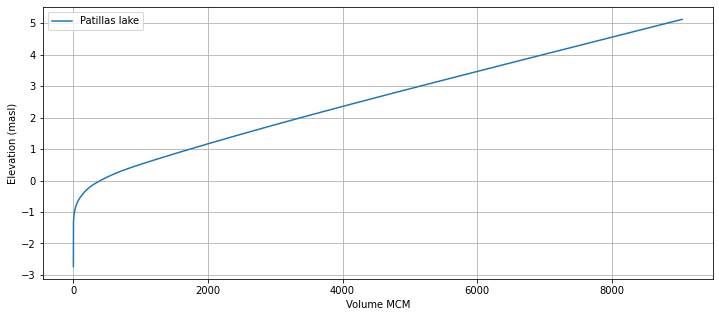

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(volArrayMCM,elevSteps,label='Patillas lake')
ax.grid()
ax.legend()
ax.set_xlabel('Volume MCM')
ax.set_ylabel('Elevation (masl)')
plt.show()

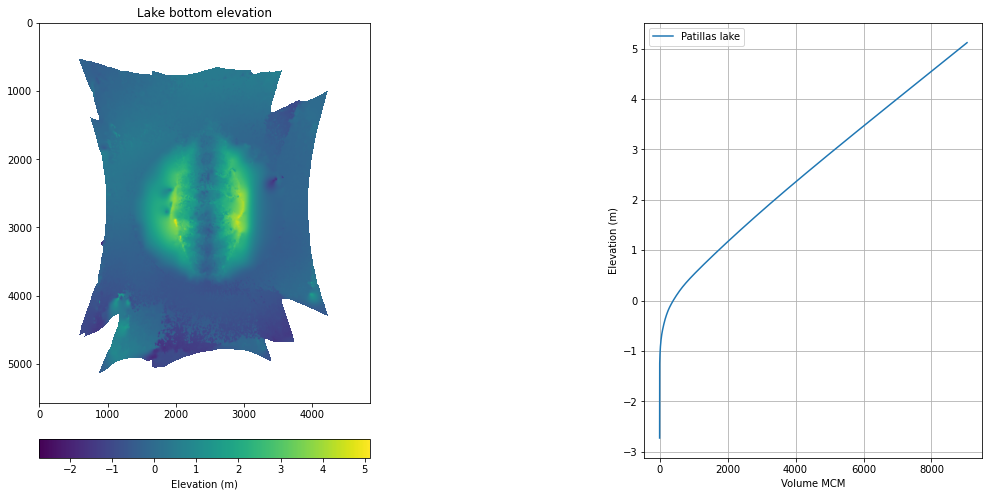

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(20,8),gridspec_kw={'width_ratios': [2, 1]})
ax1.set_title('Lake bottom elevation')
botElev = ax1.imshow(demBottom)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('bottom', size='5%', pad=0.5)
fig.colorbar(botElev, cax=cax, orientation='horizontal', label='Elevation (m)') 

ax2.plot(volArrayMCM,elevSteps,label='Patillas lake')
ax2.grid()
ax2.legend()
ax2.set_xlabel('Volume MCM')
ax2.set_ylabel('Elevation (m)')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()